![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib. pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sb
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [58]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [ ]:
# Celda 1.1
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


(1:winter, 2:spring, 3:summer, 4:fall)


A partir de los resultados obtenidos, podemos concluir que el numero de usuarios promedio que hacen uso de las bicicletas varían según la temporada, donde la temporada que tienen mayor numero de usuarios en promedio es la temporada 3 "Verano", seguido por la temporada 2 "Primavera", esto podría explicarse por las condiciones medio ambientales que son propias de cada una de estas temporadas, las cuales permiten un viaje más placentero para los usuarios.

La temporada que tiene menor numero de usuarios en promedio es la 1 "Winter", la distribución de usuarios de esta estación nos es muy baja con respecto a las otras estaciones.

Algo muy importante a remarcar es que el numero total de usuarios para cada una de las temporadas es similar e incluso igual para las temporadas 2 y 3. Esto sugiere que a pesar de la baja cantidad de usuarios durante la temporada Winter, las condiciones climáticas y medio ambientales propias de las otras temporadas hacen que los usuarios se mantengan en un nivel estable durante todo el año.

In [ ]:
# Celda 1.2
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


Este análisis descriptivo ha demostrado que el uso de bicicletas varía significativamente a lo largo del día, con una hora pico de uso a las 8 pm con 839 bicicletas usadas y un uso más bajo a las 4 am con 28 bicicletas usadas. Esto nos indica que el uso de bicicletas es principalmente para fines recreativos y que la gente prefiere usar la bicicleta para desplazarse durante el día. Por lo tanto, se puede concluir que el uso de bicicletas es más popular durante las horas de la tarde y la noche, con un descenso considerable durante la madrugada.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

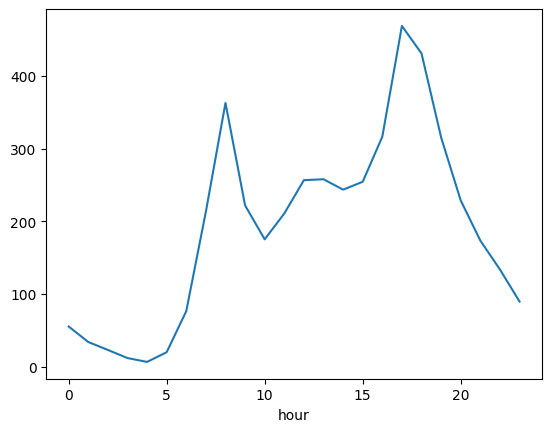

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

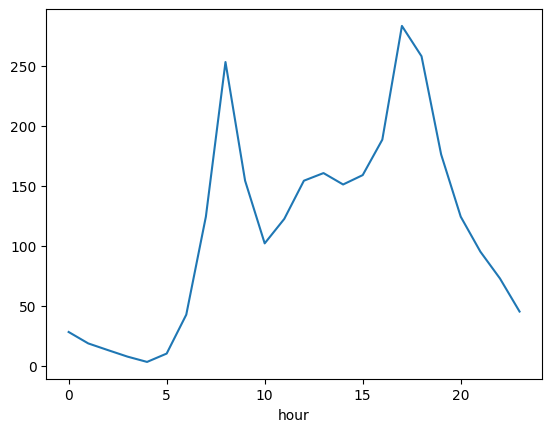

In [ ]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes.season == 1].groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

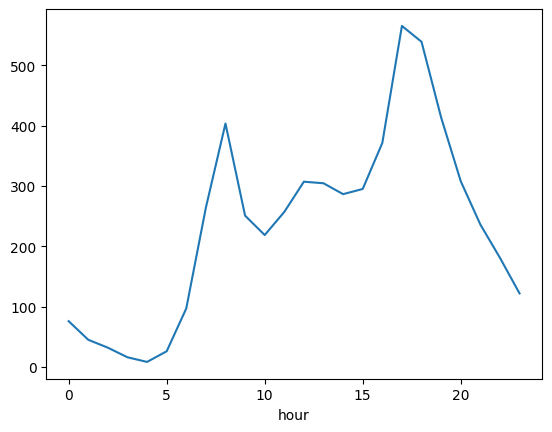

In [ ]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes.season == 3].groupby('hour').total.mean().plot()

Al comparar los gráficos generados con la celda 2.2 y 2.3, se puede observar que el número de bicicletas rentadas promedio para cada valor de la variable "hour" es significativamente mayor en verano que en invierno, lo que sugiere que los usuarios prefieren alquilar bicicletas durante la temporada de verano. Además, se observa que la cantidad promedio de bicicletas rentadas es mayor entre las horas 8 y 18, lo que indica que la mayoría de los usuarios alquilan bicicletas para realizar trabajo o estudios, ya que este es el horario habitual de actividad. Esto reforza la conclusión de que los usuarios prefieren alquilar bicicletas durante el verano.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [ ]:
# Celda 3
bikes2 = pd.get_dummies(bikes, columns=['season'],drop_first=True)

X = bikes2[['season_2', 'season_3', 'season_4','hour']]
y = bikes2['total']

modeloRL =  LinearRegression().fit(X,y)

print(modeloRL.coef_)


[100.31723192 119.46754995  84.08311787  10.54520609]


**Interpretación de los Coeficientes:**

El coeficiente de la variable "season_2" es 100.31. Esto significa que, en comparación con la primera temporada, se espera que el número total de bicicletas alquiladas aumente en 100.31 cuando la temporada sea la segunda.

El coeficiente de la variable "season_3" es 119.46. Esto significa que, en comparación con la primera temporada, se espera que el número total de bicicletas alquiladas aumente en 119.46 cuando la temporada sea la tercera.

El coeficiente de la variable "season_4" es 84.08. Esto significa que, en comparación con la primera temporada, se espera que el número total de bicicletas alquiladas aumente en 84.08 cuando la temporada sea la cuarta.

El coeficiente de la variable "hour" es 10.54. Esto significa que, para cada aumento de una hora en el tiempo del día, se espera que el número total de bicicletas alquiladas aumente en 10.54.







In [ ]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

modeloRL =  LinearRegression().fit(XTrain,yTrain)

y_pred = modeloRL.predict(XTest)

mserl = mean_squared_error(yTest, y_pred)
print('MSE:', mserl)

MSE: 25644.421108938277


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [ ]:
X = bikes[['hour', 'season','total']]
y = bikes['total']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
# Celda 4

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

j = 2
print(X.columns[j])

# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

total


array([  1.,   9.,  28.,  61., 102., 145., 192., 249., 328., 452.])

In [ ]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]


In [ ]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [ ]:
gini_r = gini(y_r)
gini_r

-216066.15221111657

In [ ]:
gini_l = gini(y_l)
gini_l

-5586.996498920642

In [ ]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [ ]:
# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

38040.44475917434

In [ ]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [ ]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(2, 228.0, 44258.08574503963)

In [ ]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [ ]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 7251, 3635)

In [ ]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 86.2483795338574, 401.6751031636864)

In [ ]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [ ]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [2, 268.0],
 'n_samples': 10886,
 'gain': 44926.25966960726,
 'sl': {'y_pred': 1,
  'y_prob': 99.40521386990635,
  'level': 1,
  'split': -1,
  'n_samples': 7900,
  'gain': 9773.585342097762},
 'sr': {'y_pred': 1,
  'y_prob': 435.06626506024094,
  'level': 1,
  'split': -1,
  'n_samples': 2986,
  'gain': 29134.699658837984}}

In [ ]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [2, 268.0],
 'n_samples': 10886,
 'gain': 44926.25966960726,
 'sl': {'y_pred': 1,
  'y_prob': 99.40521386990635,
  'level': 1,
  'split': [2, 99.0],
  'n_samples': 7900,
  'gain': 9773.585342097762,
  'sl': {'y_pred': 1,
   'y_prob': 35.18945403639757,
   'level': 2,
   'split': [2, 43.0],
   'n_samples': 4284,
   'gain': 1359.1187796229492,
   'sl': {'y_pred': 1,
    'y_prob': 15.477081041437478,
    'level': 3,
    'split': -1,
    'n_samples': 2725,
    'gain': 211.4647014688888},
   'sr': {'y_pred': 1,
    'y_prob': 69.58167841127482,
    'level': 3,
    'split': -1,
    'n_samples': 1559,
    'gain': 394.0588644335603}},
  'sr': {'y_pred': 1,
   'y_prob': 175.42260917634053,
   'level': 2,
   'split': [2, 179.0],
   'n_samples': 3616,
   'gain': 3336.2093430015375,
   'sl': {'y_pred': 1,
    'y_prob': 137.60635571501794,
    'level': 3,
    'split': -1,
    'n_samples': 1949,
    'gain': 802.7842625666235},
   'sr

In [ ]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [ ]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'MSE')

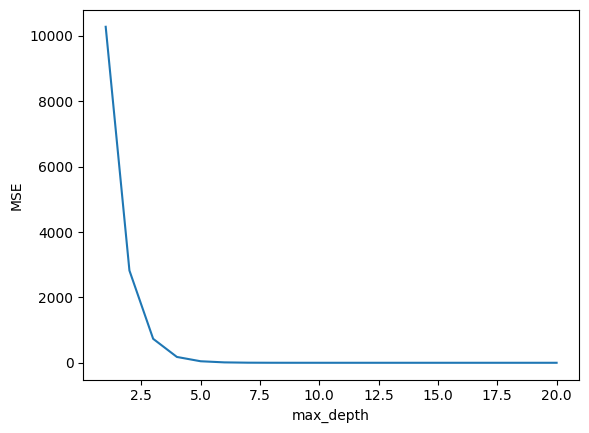

In [ ]:
# Celda 5

X = bikes[['hour', 'season','total']]
y = bikes['total']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=1)
    dtr.fit(XTrain, yTrain)
    y_pred = dtr.predict(XTest)
    accuracy_scores.append(mean_squared_error(yTest, y_pred))


# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [ ]:
dtr = DecisionTreeRegressor(max_depth= 10, random_state=1)
dtr.fit(XTrain, yTrain)

y_pred = dtr.predict(XTest)

mse = mean_squared_error(yTest, y_pred)
print('MSE:', mse)

MSE: 0.09931144108280855


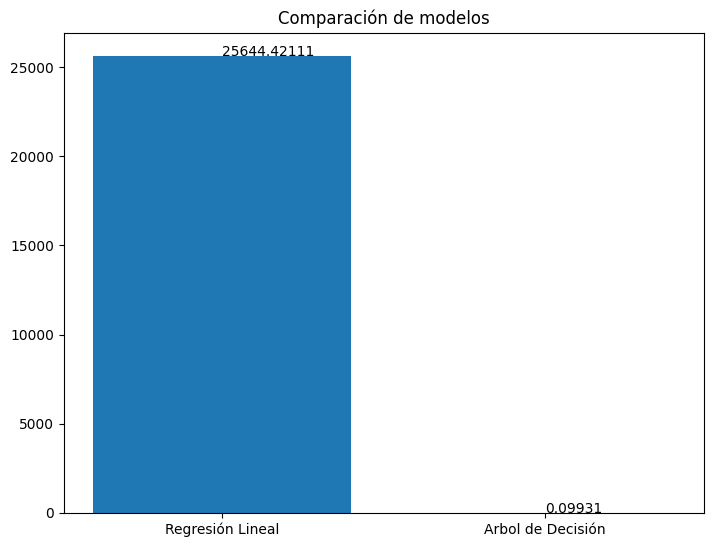

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Regresión Lineal','Arbol de Decisión']
ejeY = [mserl,mse]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],5))
addlabels(ejeX,ejeY,plt)
plt.show()

Los resultados indican que el modelo de regresión basado en árboles de decisión ofrece un rendimiento superior al modelo de regresión lineal, ya que su error cuadrático medio (MSE) es de 0.09931, frente al valor de 25644.42 del modelo de regresión lineal. Esto sugiere que el modelo de regresión basado en árboles de decisión es una mejor opción para la predicción de resultados.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

#### Árbol de Decisión


Text(0, 0.5, 'AUC')

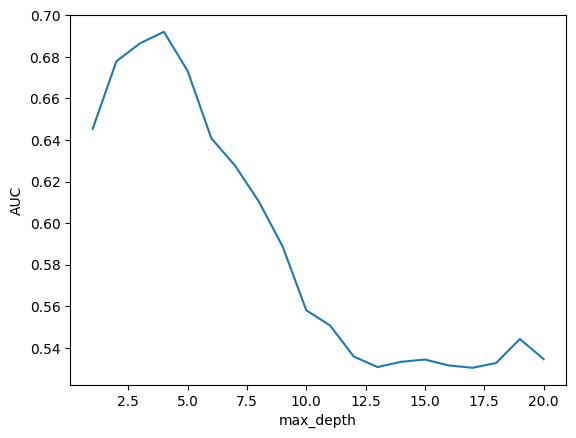

In [ ]:
#Calibración

#X_train, X_test , y_train, y_test

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
AUC_Scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(X_train, y_train)
    prediccionDT=clf.predict_proba(X_test)[:,0]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionDT, pos_label=0)
    AUC_Scores.append(metrics.auc(fpr, tpr))

plt.plot(max_depth_range, AUC_Scores)
plt.xlabel('max_depth')
plt.ylabel('AUC')

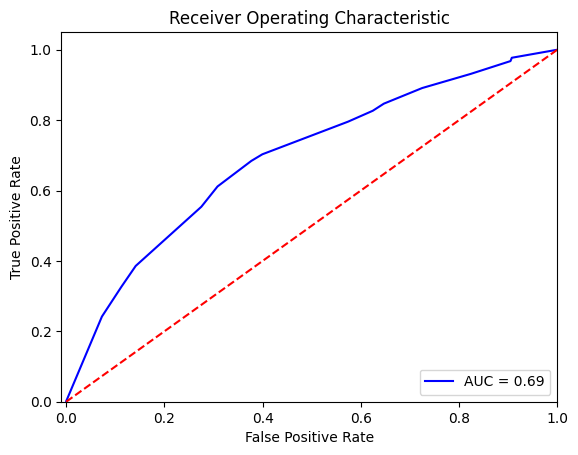

In [ ]:
#Se entrena el modelo
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X_train, y_train)

#Luego se hacen predicciones sobre la muestra
prediccionDT = clf.predict_proba(X_test)[:,0]

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionDT, pos_label=0)
AUCAD=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCAD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

# Matriz de confusión
print(' ')
print('Matriz de confusión: ')
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

#accuracy
accuracySVMP = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy: ' + str(accuracySVMP))

#precision
precisionSVMP = precision_score(y_true=y_test, y_pred=y_pred)
print('Precision: '+ str(precisionSVMP))

#f1 score
f1score = f1_score(y_test, y_pred, average='macro')
print('f1 score: '+ str(f1score))

 
Matriz de confusión: 
[[523 221]
 [302 454]]
Accuracy: 0.6513333333333333
Precision: 0.6725925925925926
f1 score: 0.6505939902166318


#### Regresión Logistica

In [ ]:
#X_train, X_test , y_train, y_test

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

#precision
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

#f1 score
f1score = f1_score(y_test, y_pred, average='macro')
print('f1 score: '+ str(f1score))

Precisión: 0.6133333333333333
f1 score: 0.6133085850827786


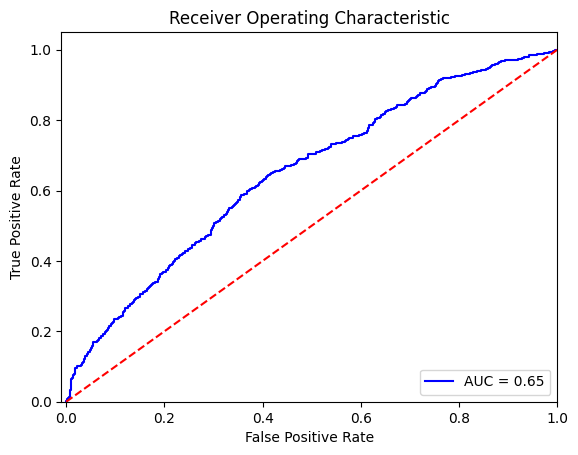

In [ ]:
#Luego se hacen predicciones sobre la muestra
prediccionModelo = modelo.predict_proba(X_test)[:,0]

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionModelo, pos_label=0)
AUCAD=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCAD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [128]:
# Entrenar los modelos base
model1 = BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth= 4), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)


model2 = BaggingClassifier(base_estimator= DecisionTreeClassifier(min_samples_leaf=10), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)


model3 = BaggingClassifier(base_estimator= LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)


# Definición del modelo BaggingClassifier de la libreria sklearn
clf1 = model1


clf2 = model2


clf3 = model3


#Train

m1 = clf1.fit(X_train, y_train)
m2 = clf2.fit(X_train, y_train)
m3 = clf3.fit(X_train, y_train)


#Prediciones

m1_pred = m1.predict(X_test)
m2_pred = m2.predict(X_test)
m3_pred = m3.predict(X_test)


# Evaluar los modelos base y el ensamble utilizando accuracy y F1-score
m1_acc = accuracy_score(y_test, m1_pred)
m2_acc = accuracy_score(y_test, m2_pred)
m3_acc = accuracy_score(y_test, m3_pred)


m1_f1 = f1_score(y_test, m1_pred)
m2_f1 = f1_score(y_test, m2_pred)
m3_f1 = f1_score(y_test, m3_pred)


print("Accuracy de los modelos base:")
print("Árbol de decisión 1:", m1_acc)
print("Árbol de decisión 2:", m2_acc)
print("Regresión logística:", m3_acc)

print("\nF1-score de los modelos base:")
print("Árbol de decisión 1:", m1_f1)
print("Árbol de decisión 2:", m2_f1)
print("Regresión logística:", m3_f1)



Accuracy de los modelos base:
Árbol de decisión 1: 0.885
Árbol de decisión 2: 0.885
Regresión logística: 0.825

F1-score de los modelos base:
Árbol de decisión 1: 0.8930232558139535
Árbol de decisión 2: 0.892018779342723
Regresión logística: 0.8387096774193548


Ensamblaje



In [129]:
models = [model1, model2, model3]

trees1 = {}
trees2 = {}
trees3 = {}

iter = [trees1, trees2, trees3]


for m, k in zip(models, iter):

  # Creación de 100 muestras de bootstrap
  n_estimators = 100
  np.random.seed(123)

  n_samples = X_train.shape[0]
  samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

  # Entrenamiento de 100 modelos con las 100 muestras boostrap

  np.random.seed(123) 
  seeds = np.random.randint(1, 10000, size=n_estimators)

  for i in range(n_estimators):
    k[i] = m
    k[i].fit(pd.DataFrame(X_train).iloc[samples[i]], pd.Series(y_train).iloc[samples[i]])

In [130]:
Ntrees2 = {}
for key, value in trees2.items():
    new_key = key + 100  # Nuevo key
    Ntrees2[new_key] = value  # Agregar el par clave-valor al nuevo diccionario

Ntrees3 = {}
for key, value in trees3.items():
    new_key = key + 200  # Nuevo key
    Ntrees3[new_key] = value  # Agregar el par clave-valor al nuevo diccionario


treesALL = {**trees1, **Ntrees2,**Ntrees3}

In [131]:
# asegurarse de que X_test es un DataFrame

n_estimators = 300

#treesALL

if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, index=range(X_test.shape[0]), columns=range(X_test.shape[1]))

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = treesALL[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
ensamble_f1 = metrics.f1_score(y_pred, y_test)

In [133]:
# Desempeño al hacer votación mayoritaria
ensamble_acc = metrics.accuracy_score(y_pred, y_test)

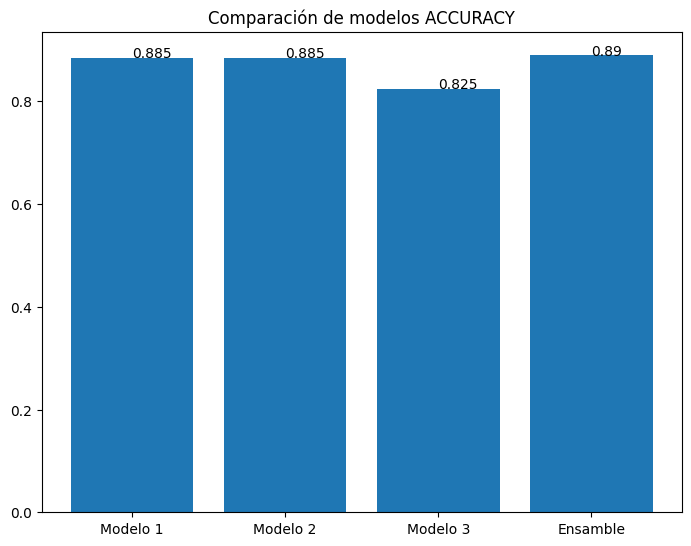

In [134]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos ACCURACY")
ejeX = ['Modelo 1','Modelo 2',"Modelo 3","Ensamble"]
ejeY = [m1_acc,m2_acc,m3_acc,ensamble_acc]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],5))
addlabels(ejeX,ejeY,plt)
plt.show()

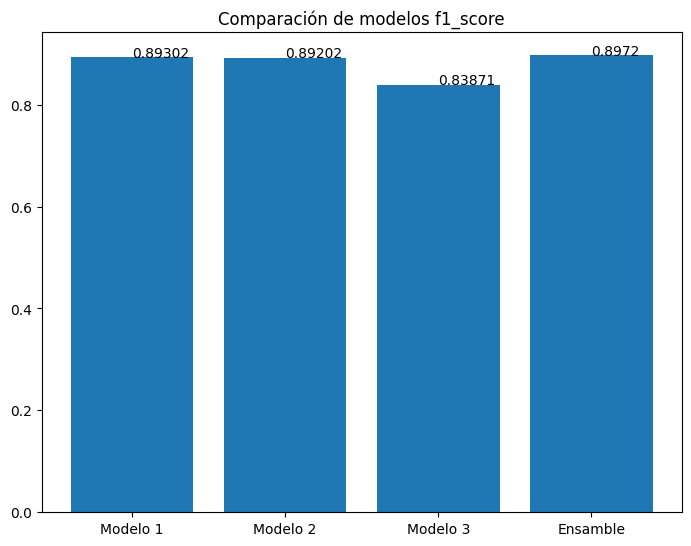

In [135]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos f1_score")
ejeX = ['Modelo 1','Modelo 2',"Modelo 3","Ensamble"]
ejeY = [m1_f1,m2_f1,m3_f1,ensamble_f1]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],5))
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [143]:
#Celda #8

#treesALL
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
n_estimators = 100


errors = np.zeros(n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], n_estimators))

for i in range(n_estimators):

  clf = treesALL[i]
  oob_sample = ~clf.estimators_samples_[i] #posible fix
 
  #y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
  y_pred_ = clf.estimators_[i].predict(X_train[oob_sample])
  #errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
  errors[i] = metrics.accuracy_score(y_pred_, y_train[oob_sample])
  y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.888888888888889, 0.88)

In [ ]:
#Celda #8

#treesALL
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
n_estimators = 300
n_estimators2 = 100


errors = np.zeros(n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], n_estimators))

for i in range(n_estimators):
  for p in range(n_estimators2):
    clf = treesALL[i]
    oob_sample = ~clf.estimators_samples_[p] #puede ser i
    y_pred_ = clf.estimators_[p].predict(X_train[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[p].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


In [146]:
Ensamblaje2_f1 = metrics.f1_score(y_pred, y_test), 
Ensamblaje2_ACC = metrics.accuracy_score(y_pred, y_test)

print("Accuracy:", Ensamblaje2_ACC)
print("F1-Score:", Ensamblaje2_f1)

Accuracy: 0.86
F1-Score: (0.8666666666666667,)


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

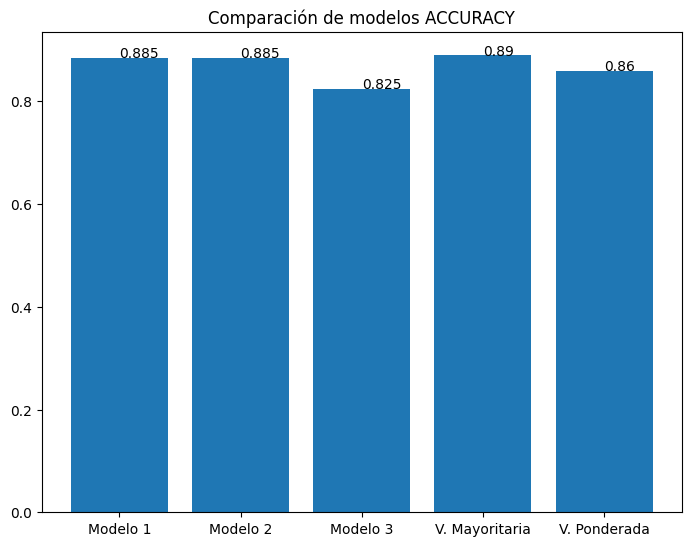

In [147]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos ACCURACY")
ejeX = ['Modelo 1','Modelo 2',"Modelo 3","V. Mayoritaria","V. Ponderada"]
ejeY = [m1_acc,m2_acc,m3_acc,ensamble_acc, Ensamblaje2_ACC]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],5))
addlabels(ejeX,ejeY,plt)
plt.show()